# 02. Logistic Regression with TF

<p style="text-align: right;">
rayleigh@dplus.company<br>
Your name :
</p>

### 텐서플로 실습시간 그 세번째!<br>

#### 선행지식
1. 모델링을 한다는 것에 대한 이해.
2. Supervised Learning 중 Classification에 대한 기본 지식.
3. 로지스틱 리그레션에 대한 기본 구조와 개념
4. 앞서 진행한 2번의 실습에 대한 추억(00. Hello World with TF, 01. Linear Regression with TF)

#### 실습목표
1. Logistic Regression의 구조를 Graph로 그려낼 수 있다.
2. 그려낸 Graph를 텐서플로우를 이용해 코딩할 수 있다.
3. (Optional) Encoding이 무엇인지 이해한다. --> Dummy Variable, Onehot-encoding 등의 필요성을 이해한다.
4. (Optional) Logistic Regression 과 Softmax Regression이 사실상 같은 내용임을 알 수 있다.

#### 사용데이터.

01. Binary Classification : https://stats.idre.ucla.edu/stat/data/binary.csv
02. Multinomial Classification : http://yann.lecun.com/exdb/mnist/

## 00. 라이브러리 불러오기

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import time

## 01. 데이터 불러오기 & 문제정의 & 전처리

In [0]:
data = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
data.head(n=10)

In [0]:
# rank는 더미가 필요
dummy = pd.get_dummies(data['rank'])
temp = data.drop('rank', axis=1)
data = pd.concat([temp, dummy], axis=1)
data.head(n=10)


#### 데이터 설명.

A researcher is interested in how variables, such as GRE (Graduate Record Exam scores), GPA (grade point average) and prestige of the undergraduate institution, effect admission into graduate school. The response variable, admit/don’t admit, is a binary variable.

나는 대학원 지원자.<br>
내가 합격할 가능성은 어느정도나 될까..?
그리고 그것을 어떻게 확인할까..?

In [0]:
# Pandas DataFrame to Numpy Array
data_array = data.values
print(data_array[:5], data_array.shape)

In [0]:
# Shuffle!
np.random.shuffle(data_array)
print(data_array)

In [0]:
# Training set / Test set Split
train, test = data_array[:300], data_array[300:]
X_train, Y_train = train[:, 1:], train[:, :1]  # shape 확인 꼭 해볼 것.
X_test, Y_test = test[:, 1:], test[:, :1]

In [0]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


## 02. 손으로 그려보는 Logistic Regression



*직접, 손으로 구조를 설계 해보는 것은 중요하다.*<br>

여러분이 텐서플로우로 '그래프'를 코딩하기에 최대한 편한 설계도를 그리면 된다.<br>
꼭 Data flow Graph, Computation Grpah, Probabilistic Graph 등의 표현을 따를 필요는 없다.(물론, 익히면 좋다.)<br>


### 예시.  여러분이 직접 그려보기 전에는 실행 시키지 말기!

[로지스틱01](https://github.com/blackdew/dplus-tensorflow/blob/master/img/Logistic_1.PNG?raw=true)
[로지스틱02](https://github.com/blackdew/dplus-tensorflow/blob/master/img/Logistic_2.PNG?raw=true)

### 반드시 차원을 고려 할 것!

X의 shape = [ 300 ,  6 ]

Y의 shape = [ 300 ,  1 ]

W의 shape = [ 6 ,  1 ]

bias의 shape = [ 1 ]

연산순서는?

## 03. Make a Graph with TF

In [0]:
'''
여러분이 직접 스크립트를 짜야 합니다.
조금 힌트는 드립니다..!
'''
# Graph Clear & Make your Graph reproducible
tf.reset_default_graph()
tf.set_random_seed(2017)

# Hyper-Parameters & Option
learning_rate = 0.01

# Placeholders
X = tf.placeholder(dtype=tf.float32, shape=[None, 6])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

# Weight & Bias
W = tf.Variable(tf.random_normal([6, 1]))
b = tf.Variable(tf.random_normal([1]))

# Hypothesis
logits = tf.add(tf.matmul(X, W), b)
Y_prob = tf.sigmoid(logits)

# Classification & Accuracy
Y_pred = tf.cast(Y_prob > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(Y_pred, Y), dtype=tf.float32))

# Cost(loss) function & Optimizer
# cost = -1 * tf.reduce_mean(Y * tf.log(Y_prob) + (1 - Y) * tf.log(1 - Y_prob))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


## 04. Train! Session!

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

learning_rate = 0.01

for i in range(3000):
    # 학습 진행
    sess.run(optimizer, feed_dict={X: X_train, Y: Y_train})
    
    if (i % 100 == 0):
        # 학습 상황 디스플레이
        tr_l, tr_a = sess.run([cost, accuracy], feed_dict={X: X_train, Y: Y_train})        
        print( "{}th epoch, training accuracy: {:.2f}%, training loss: {:.2f}".format(i, tr_a * 100, tr_l))
        
print("Training Complete")        
test_accuracy = sess.run(accuracy, feed_dict={X: X_test, Y: Y_test})
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Admit Rate: {:.2f}%".format(data_array[:, 0].mean() * 100))
print(sess.run([W[:, 0], b]))

sess.close()

#### 실습

* Linear Regression - https://raw.githubusercontent.com/blackdew/dplus-tensorflow/master/csv/usa_housing.csv
* Logistic Regression - https://raw.githubusercontent.com/blackdew/dplus-tensorflow/master/csv/titanic.csv"

In [25]:
# 1. 'https://raw.githubusercontent.com/blackdew/dplus-tensorflow/master/csv/usa_housing.csv' 데이터를 읽어들인다.
housing = pd.read_csv("https://raw.githubusercontent.com/blackdew/dplus-tensorflow/master/csv/usa_housing.csv")
print(housing.shape)

# 2. 범주형 변수는 더미변수화 한다.

# 3. 필요 없어진 변수를 제거한다.
fields_to_drop = ['Address']
data = housing.drop(fields_to_drop, axis=1)

# 4. 연속형 변수를 scailing 한다. 
quant_features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']
scaled_features = {}

for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean) / std

# 5. test set과 training set로 분리한다.
data = data.sample(frac=1)
train, test = data[:-int(0.3 * len(data))], data[-int(0.3 * len(data)):]
test = test.sort_values(by=['Price'], ascending=False)
print(test.head())
print(train.shape)
print(test.shape)

# 6. 종속 변수의 값을 target value로 지정한다.
target_fields = ['Price']
test_features, test_targets = test.drop(target_fields, axis=1), test[target_fields]
train_features, train_targets = train.drop(target_fields, axis=1), train[target_fields]

test_X, test_Y = test_features.values, test_targets.values
train_X, train_Y = train_features.values, train_targets.values


(5000, 7)
      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
924           1.429068             2.616933                   0.402027   
1248          2.453639             1.925054                   0.173568   
901           1.924033             1.179098                   2.179488   
1536          0.086508             1.386979                   3.749922   
1195          2.358452             0.582813                   0.606944   

      Avg. Area Number of Bedrooms  Area Population     Price  
924                      -0.479144         1.548971  3.110060  
1248                      1.157626         1.022721  3.076066  
901                       1.060393         1.372065  2.942476  
1536                      0.938850         1.203819  2.841042  
1195                      1.222449         0.376493  2.666919  
(3500, 6)
(1500, 6)


In [0]:
'''
7. TensorFlow 그래프를 전체를 직접 작성한다.
'''

# Graph Clear & Make your Graph reproducible
tf.reset_default_graph()

# Hyper-Parameters & Option
learning_rate = 0.01

# Placeholders
X = tf.placeholder(dtype=tf.float32, shape=[None, 5])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

# Weight & Bias
W = tf.Variable(tf.random_normal([5, 1]))
b = tf.Variable(tf.random_normal([1]))

# Hypothesis
Y_pred = tf.add(tf.matmul(X, W), b)

# Cost(loss) function & Optimizer
cost = tf.losses.mean_squared_error(Y, Y_pred)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


In [27]:
'''
8. 학습하는 세션 코드 전체를 직접 작성해 보자.
'''

sess = tf.Session()
sess.run(tf.global_variables_initializer())

start = time.clock()
for i in range(1000):
    # 학습 진행
    sess.run(optimizer, feed_dict={X: train_X, Y:train_Y})
    
    if (i % 100 == 0):
        # 학습 상황 디스플레이
        tr_l = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        print("{}th training---- training loss: {:.5f}".format(i, tr_l))
        
print("Training Complete")
end = time.clock()

print("Total elapsed time: {}".format(end - start))
print("Test loss: {:.5f}".format(sess.run(cost, feed_dict={X: test_X, Y: test_Y})))

# 결과값 예측
Y_predicted = sess.run(Y_pred, feed_dict={X: test_X, Y: test_Y})


0th training---- training loss: 8.57621
100th training---- training loss: 1.92541
200th training---- training loss: 0.39853
300th training---- training loss: 0.12011
400th training---- training loss: 0.08618
500th training---- training loss: 0.08351
600th training---- training loss: 0.08337
700th training---- training loss: 0.08337
800th training---- training loss: 0.08337
900th training---- training loss: 0.08337
Training Complete
Total elapsed time: 0.9185420000000004
Test loss: 0.07890


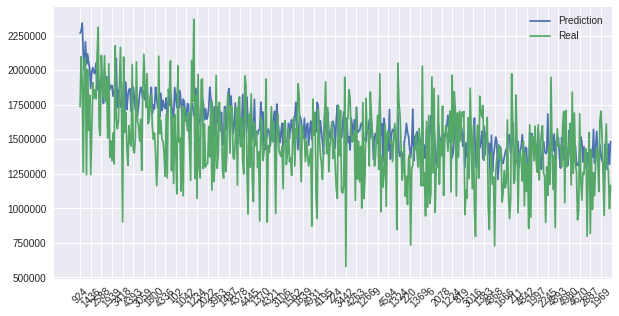

In [30]:
'''
9. 검증하는 그래프를 그려보자.
'''

# 그래프로 확인
# target_fields = ['Price']

column = 'Price'
cindex = target_fields.index(column)
rows0, rows1 = 0, 500

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))

# unscailing - 예측값도 Scaling 되어 있으므로 그것을 원래대로 되돌려주는 과정
mean, std = scaled_features[column]
predictions = Y_predicted[rows0:rows1, cindex] * std + mean
REAL = test_X[rows0:rows1, cindex] * std + mean

ax.plot(predictions, label='Prediction')
ax.plot(REAL, label='Real')
ax.set_xlim(right=len(Y_predicted[rows0:rows1, cindex]))
ax.legend()

ax.set_xticks(np.arange(len(test[rows0:rows1].index))[0::10])
_ = ax.set_xticklabels(test[rows0:rows1].index[0::10], rotation=45)

In [36]:
print(test_X)
print(REAL)

[[ 1.42906781  2.61693324  0.4020271  -0.47914443  1.54897066]
 [ 2.45363894  1.92505409  0.17356833  1.1576265   1.02272132]
 [ 1.92403265  1.17909832  2.17948823  1.06039258  1.37206489]
 ...
 [-0.78958935 -1.39855789 -3.01920746  0.06374494 -1.9497174 ]
 [-2.87220179 -1.70052713 -1.17343739 -0.60068683 -0.29174394]
 [-1.99497742 -2.44001533  0.01908384 -0.66550944 -2.05396092]]
[1736701.68773636 2098495.81401945 1911482.49736321 1262620.18763335
 2064883.66224168 2087195.46414822 1244062.65171249 2005773.22382228
 1566580.80305398 1819241.55925002 1244175.5850505  1579117.19323148
 1909532.02064604 1797935.79103645 1857861.199941   1793316.84435907
 2103658.70202769 2310881.85088015 1576005.96611372 1526053.18110998
 2107335.85832334 1909407.70080894 1800635.57160322 2104772.11951241
 1776292.97969494 1935310.71798645 1507907.3966363  2046959.92796893
 1369978.34589489 1488444.40304909 1344141.11075465 1546553.6473786
 1322121.30415425 2177295.97501429 1659716.45698902 1576576.16768

In [19]:
test = test.sort_values(by=['Price'], ascending=False)
test.head(10)

print(Y_predicted)


[[-0.44181323]
 [ 0.8349636 ]
 [ 0.81161636]
 ...
 [-0.8462035 ]
 [ 1.2276084 ]
 [ 0.35240328]]


In [0]:
# 1. 'https://raw.githubusercontent.com/blackdew/dplus-tensorflow/master/csv/titanic.csv' 데이터를 읽어들인다.
titanic = pd.read_csv("https://raw.githubusercontent.com/blackdew/dplus-tensorflow/master/csv/titanic.csv")
print(titanic.shape)

# 2. 범주형 변수는 더미변수화 한다.
dummy_fields = ['Pclass', 'Sex', 'Embarked', 'AgeGroup']
for each in dummy_fields:
    dummies = pd.get_dummies(titanic[each], prefix=each, drop_first=False)
    titanic = pd.concat([titanic, dummies], axis=1)

# 3. 필요 없어진 변수를 제거한다.
fields_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Pclass', 'Sex', 'Embarked', 'AgeGroup']
data = titanic.drop(fields_to_drop, axis=1)

# 4. 연속형 변수를 scailing 한다. 
quant_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Family']
scaled_features = {}

for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean) / std

# 5. test set과 training set로 분리한다.
data = data.sample(frac=1)
train, test = data[:-int(0.3 * len(data))], data[-int(0.3 * len(data)):]
print(train.shape)
print(test.shape)

# 6. 종속 변수의 값을 target value로 지정한다.
target_fields = ['Survived']
test_features, test_targets = test.drop(target_fields, axis=1), test[target_fields]
train_features, train_targets = train.drop(target_fields, axis=1), train[target_fields]

test_X, test_Y = test_features.values, test_targets.values
train_X, train_Y = train_features.values, train_targets.values
print(train_X.shape)
print(train_Y.shape)


In [0]:
'''
7. TensorFlow 그래프를 전체를 직접 작성한다.
'''
# Graph Clear & Make your Graph reproducible
tf.reset_default_graph()

# Hyper-Parameters & Option
learning_rate = 0.01

# Placeholders
X = tf.placeholder(dtype=tf.float32, shape=[None, 22])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

# Weight & Bias
W = tf.Variable(tf.random_normal([22, 1]))
b = tf.Variable(tf.random_normal([1]))

# Hypothesis
logits = tf.add(tf.matmul(X, W), b)
Y_prob = tf.sigmoid(logits)

# Classification & Accuracy
Y_pred = tf.cast(Y_prob > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(Y_pred, Y), dtype=tf.float32))

# Cost(loss) function & Optimizer
# cost = -1 * tf.reduce_mean(Y * tf.log(Y_prob) + (1 - Y) * tf.log(1 - Y_prob))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


In [0]:
'''
8. 학습하는 세션 코드 전체를 직접 작성해 보자.
'''

sess = tf.Session()
sess.run(tf.global_variables_initializer())

learning_rate = 0.01

for i in range(3000):
    # 학습 진행
    sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})
    
    if (i % 100 == 0):
        # 학습 상황 디스플레이
        tr_l, tr_a = sess.run([cost, accuracy], feed_dict={X: train_X, Y: train_Y})        
        print( "{}th epoch, training accuracy: {:.2f}%, training loss: {:.2f}".format(i, tr_a * 100, tr_l))
        
print("Training Complete")        
test_accuracy = sess.run(accuracy, feed_dict={X: test_X, Y: test_Y})
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print(sess.run([W[:, 0], b]))


## 이제는 MNIST를 분류해보자!

In [0]:
tf.reset_default_graph()
%reset

In [37]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

mnist = tf.contrib.learn.datasets.load_dataset("mnist")
print(tf.convert_to_tensor(mnist.train.images).get_shape())


Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-u

In [40]:
print(mnist.test.labels[0])
print(mnist.test.images[0])


7
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.       

In [0]:
'''
mnist 시각화 함수
'''
def mnist_plot(i):
    pixels = mnist.test.images[i].reshape((28, 28))
    a = mnist.test.labels.tolist()
    plt.title('Label: {}'.format(a[i]))
    plt.imshow(pixels, cmap='gray')
    return plt.show()

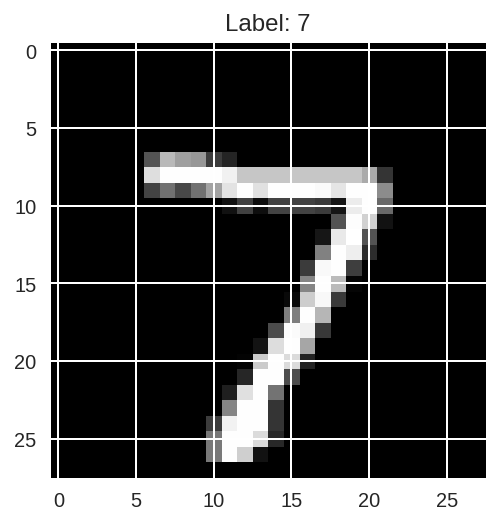

In [42]:
'''
0 ~ 9999 사이의 숫자를 넣어서 확인해보자.
'''
mnist_plot(0)

### 00. 문제를 정의하고, 데이터를 확인해보자.

옛날 옛적, 호랑이가 딱 담배 끊을즈음 시기에..

우리는 우체국에서 일하는 직원이었다..

나는 하루 종일 우편번호를 읽고 각 동별로 분류작업을 해야 했다..

편지는 하루 1000여 통 이상 도착하고.. 나는 하루 4시간은 꼬박 분류만 해야한다..

지친다...

#### 문제상황은? :

In [0]:
'''
트레이닝 데이터로 활용할 55000개 이미지, 테스트용 10000개 이미지
28*28 사이즈의 이미지가 그냥 주욱 784칸 짜리 어레이에 담겨있다.
레이블은 one-hot encoding을 해주어야 한다. 
'''
print(mnist.train.images.shape, mnist.train.labels.shape)
print(mnist.test.images.shape, mnist.test.labels.shape)

mnist.train.labels_onehot = np.eye(10)[mnist.train.labels]
mnist.test.labels_onehot = np.eye(10)[mnist.test.labels]

print(mnist.train.images.shape, mnist.train.labels_onehot.shape)
print(mnist.test.images.shape, mnist.test.labels_onehot.shape)

In [0]:
mnist.train.images[0]

In [0]:
mnist.train.labels[0]

In [0]:
np.eye(10)[mnist.train.labels[0]]

### 01. 손으로 설계해보자!

위의 문제와는 다르다.
Logistic Regression의 sigmoid 함수는 binary classification 용이다.<br>
multinomial classification을 위해서는 Softmax를 사용해야 하는데,<br>
무서워하지 말자. sigmoid의 확장판일 뿐!<br>
Multinomial Logistic Regression을 간단히 Softmax Regression을 사용할 뿐!<br>

인터넷에는 아래와 같은 이미지도 돌아다닌다.
![이미지](https://image.slidesharecdn.com/deeplearningintheano-160311150524/95/deep-learning-in-theano-10-638.jpg?cb=1457708806)

#### 하지만 손으로 직접 그려보자. 자기가 이해한 방식대로.



### 02. 텐서서플로우로 그래프를 만들자!

In [0]:
'''
직접 짜야 합니다!
아래를 먼저 풀어보자!

인풋의 Shape = [None, 784]
아웃풋의 Shape = [None, 10]
Weight 의 Shape = [784, 10]
Bias 의 Shape = [10]
'''
# Graph Clear & Make your Graph reproducible
tf.reset_default_graph()
tf.set_random_seed(2017)

# Hyper parameters & Option
learning_rate = 0.01

# Place Holders
X = tf.placeholder(dtype=tf.float32, shape=[None, 784])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 10])

# Weights & bias
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

# Hypothesis
logits = tf.add(tf.matmul(X, W), b)
Y_prob = tf.nn.softmax(logits)

# Accuracy
n_of_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy =  tf.reduce_mean(tf.cast(n_of_correct, tf.float32))

# Cost(loss) function & Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### 03. 세션을 만들고, 학습시키자!

In [0]:
print(mnist.train.num_examples)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(200):
    # 학습 진행
    X_train, Y_train = mnist.train.images, np.eye(10)[mnist.train.labels]
    sess.run(optimizer, feed_dict={X: X_train, Y: Y_train})

    if (i % 5 == 0): 
        # 학습 상황 디스플레이
        tr_a = sess.run(accuracy, feed_dict={X: X_train, Y: Y_train})
        print("{}th, training accuracy: {:.3f}%".format(i, tr_a * 100))
        
print("Training Complete")        
test_accuracy = sess.run(accuracy,
                         feed_dict={X: mnist.test.images, Y: np.eye(10)[mnist.test.labels]})
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
# print(sess.run([W[:, 0], b]))

#### batch & epochs

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 500
epochs = 20

for i in range(epochs):
    print("{}th".format(i + 1))
    
    '''
    갯수가 너무 많아서 배치로 끊어서 학습
    '''
    n_of_batches = int(mnist.train.num_examples / batch_size)
    for batch in range(n_of_batches):
        X_batch, Y_batch = mnist.train.next_batch(batch_size)
        # 학습 진행
        sess.run(optimizer, feed_dict={X: X_batch, Y: np.eye(10)[Y_batch]})

        if (batch % 5 == 0): 
            # 학습 상황 디스플레이
            tr_a = sess.run(accuracy, feed_dict={X: X_batch, Y: np.eye(10)[Y_batch]})
            print("training accuracy: {:.3f}%".format(tr_a * 100))
        
print("Training Complete")        
test_accuracy = sess.run(accuracy,
                         feed_dict={X: mnist.test.images, Y: np.eye(10)[mnist.test.labels]})
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
# print(sess.run([W[:, 0], b]))

### 성능을 한 번 확인해 보자. 제대로 되고 있는걸까?

In [0]:
n = int(np.random.uniform(0, 9999, 1))
Predicted_distribution = sess.run(Y_prob, feed_dict={X: [mnist.test.images[n]]})
Predicted_distribution = Predicted_distribution[0]
pd_dict = {i:'%.2f' % prob for i, prob in enumerate(Predicted_distribution)}

print(pd_dict)
mnist_plot(n)


### 실습

In [0]:
'''
TensorFlow 그래프를 전체를 직접 작성해 보자
'''
import tensorflow as tf

# mnist dataset
mnist = tf.contrib.learn.datasets.load_dataset("mnist")

# Graph Clear & Make your Graph reproducible
tf.reset_default_graph()
tf.set_random_seed(2017)

# Hyper parameters & Option
learning_rate = 0.01

# Place Holders
X = tf.placeholder(dtype=tf.float32, shape=[None, 784])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 10])

# Weights & bias
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

# Hypothesis
logits = tf.add(tf.matmul(X, W), b)
Y_prob = tf.nn.softmax(logits)

# Accuracy
n_of_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy =  tf.reduce_mean(tf.cast(n_of_correct, tf.float32))

# Cost(loss) function & Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)



In [0]:
'''
학습하는 세션 코드 전체를 직접 작성해 보자
'''

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 500
epochs = 20

for i in range(epochs):
    print("{}th".format(i + 1))
    
    '''
    갯수가 너무 많아서 배치로 끊어서 학습
    '''
    n_of_batches = int(mnist.train.num_examples / batch_size)
    for batch in range(n_of_batches):
        X_batch, Y_batch = mnist.train.next_batch(batch_size)
        # 학습 진행
        sess.run(optimizer, feed_dict={X: X_batch, Y: np.eye(10)[Y_batch]})

        if (batch % 5 == 0): 
            # 학습 상황 디스플레이
            tr_a = sess.run(accuracy, feed_dict={X: X_batch, Y: np.eye(10)[Y_batch]})
            print("training accuracy: {:.3f}%".format(tr_a * 100))
        
print("Training Complete")        
test_accuracy = sess.run(accuracy,
                         feed_dict={X: mnist.test.images, Y: np.eye(10)[mnist.test.labels]})
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
# print(sess.run([W[:, 0], b]))



# must Summary!